# CENG 111 Computer Programming I [Fall 2023 - 2024]
## Week 07 - File Operation and Exceptions

## Objectives of the seventh week's lecture.

- *File operation*
- *Directory*
- *Exception*
- *Exception handling*

## File operation

Files are named locations on disk to store related information. They are used to permanently store data in a non-volatile memory (e.g. hard disk).

Since **Random Access Memory (RAM)** is volatile (which loses its data when the computer is turned off), we use files for future use of the data by permanently storing them.

When we want to read from or write to a file, we need to open it first. When we are done, it needs to be closed so that the resources that are tied with the file are freed.

Hence, in Python, a file operation takes place in the following order:

1. Open a file (Opening an input file allows the program to read data from the file.)
2. Read or write (perform operation)
3. Close the file

### Opening Files in Python

Python has a built-in **open()** function to open a file. This function returns a file object, also called a handle, as it is used to read or modify the file accordingly.

In [ ]:
f = open("test2.txt") # open file in current directory

In [ ]:
f = open("test.txt") # open file in current directory

In [ ]:
f.close()

In this example, we open the file test.txt, which should be stored in the same folder that you are in when you start Python.

In [ ]:
# For example, this is a sample of a text file which records mail activity 
# from various individuals in an open source project development team:
fhand = open('philosophers.txt')

In [ ]:
fhand.close()

In [ ]:
help(open)

When you pass a file name that does not contain a path as an argument to the open function, the Python interpreter assumes the file’s location is the same as that of the program.

In [ ]:
# Open a file named philosophers.txt.
outfile = open('philosophers.txt')
#print(outfile)
#outfile.read()
#outfile.close()

For example, suppose a program is located in the following folder on a Windows computer:

In [ ]:
file = open("C:/Python38/README.txt") # specifying full path

We can specify the mode while opening a file. In mode, we specify whether we want to read **r**, write **w** or append **a** to the file. We can also specify if we want to open the file in text mode or binary mode.

The default is reading in text mode. In this mode, we get strings when reading from the file.

On the other hand, binary mode returns bytes and this is the mode to be used when dealing with non-text files like images or executable files.

<table>
<tr>
  <th>Mode<th><th>Descriptions<th>
<tr>
  <td>r<td><td>Opens a file for reading. (default)<td>
<tr>
  <td>w<td><td>Opens a file for writing. Creates a new file if it does not exist or truncates the file if it exists.<td>
<tr>
  <td>x<td><td>Opens a file for exclusive creation. If the file already exists, the operation fails.<td>
<tr>
  <td>a<td><td>Opens a file for appending at the end of the file without truncating it. Creates a new file if it does not exist.<td>
<tr>
  <td>t<td><td>Opens in text mode. (default)<td>
<tr>
<td>b<td><td>Opens in binary mode.<td>
<tr>
<td>+<td><td>Opens a file for updating (reading and writing)<td>
<tr>
<table>

In [ ]:
file1 = open("philosophers.txt", 'r')      # equivalent to 'r' or 'rt'

In [ ]:
file1 = open('philosophers.txt', 'w')  # write in text mode

In [ ]:
file2 = open("flowers.jpg", 'r+b') # read and write in binary mode

In [ ]:
file2.close()

In [ ]:
file1.close()

ASCII, abbreviated from American Standard Code for Information Interchange, is a character encoding standard for electronic communication. 

Unlike other languages, the character **a** does not imply the number 97 until it is encoded using **ASCII** (or other equivalent encodings).

So, we must not also rely on the default encoding or else our code will behave differently in different platforms.

Hence, when working with files in text mode, it is highly recommended to specify the encoding type.

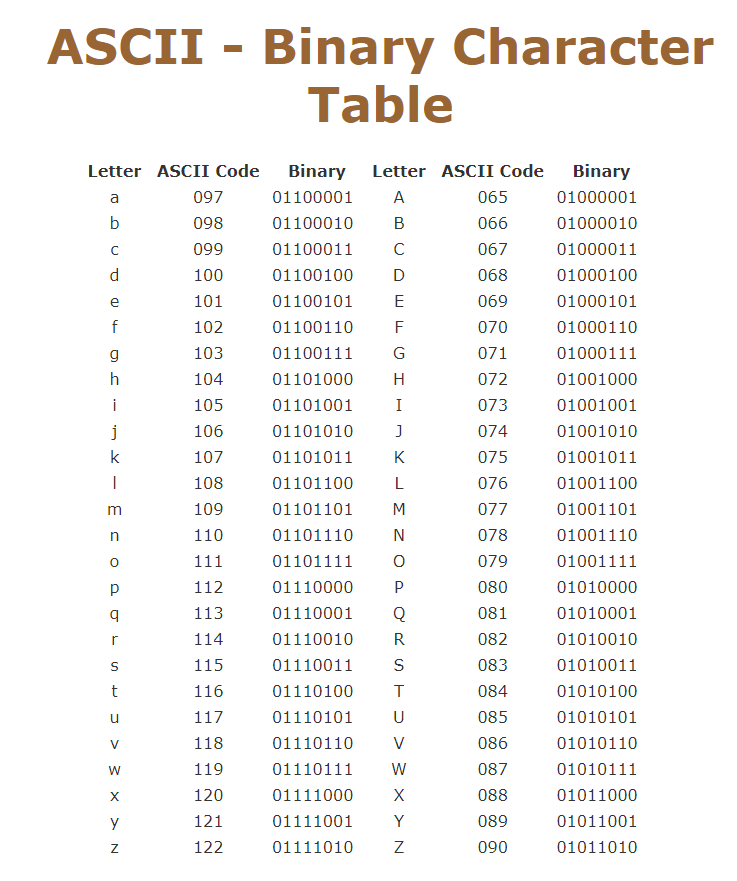

In [ ]:
file1 = open("philosophers.txt", mode='r', encoding='utf-8')

### Closing Files in Python

When we are done with performing operations on the file, we need to properly close the file.

Closing a file will free up the resources that were tied with the file. It is done using the close() method available in Python.

Python has a garbage collector to clean up unreferenced objects but we must not rely on it to close the file.

In [ ]:
file1 = open("philosophers.txt", mode = 'w', encoding = 'utf-8')
# perform file operations
# Write
file1.close()

This method is not entirely safe. If an exception occurs when we are performing some operation with the file, the code exits without closing the file.

A safer way is to use a **try...finally** block.

In [ ]:
try:
    file1 = open("philosophers.txt", encoding = 'utf-8')
    # perform file operations
    # read    
finally:
    file1.close()

The **finally** keyword is used in **try...except** blocks. It defines a block of code to run when the **try...except...else** block is final.

The **finally** block will be executed no matter if the try block raises an error or not.

This can be useful to close objects and clean up resources.

This way, we are guaranteeing that the file is properly closed even if an exception is raised that causes program flow to stop.

The best way to close a file is by using the **with** statement. This ensures that the file is closed when the block inside the **with** statement is exited.

We don't need to explicitly call the **close()** method. It is done internally.

In [ ]:
# Open and read a file using the with statement
with open('philosophers.txt', 'r') as file1:
    content = file1.read()
    print(content)

# Output:
# 'Contents of the file are printed here.'
# The file 'myfile.txt' is now closed automatically.

In [ ]:
content

- In Python, we represent the newline character as a backslash-n in string constants.

- Even though this looks like two characters, it is actually a single character. 

- When we look at the variable by entering “stuff” in the interpreter, it shows us the \n in the string, but when we use print to show the string, we see the string broken into two lines by the newline character.

In [ ]:
stuff = 'Hello\nWorld!'
stuff

In [ ]:
print(stuff)

In [ ]:
stuff = 'X\nY'
print(stuff)

In [ ]:
len(stuff)

You can also see that the length of the string X\nY is three characters because the newline character is a single character.

So when we look at the lines in a file, we need to imagine that there is a special invisible character called the newline at the end of each line that marks the end of the line.

So the newline character separates the characters in the file into lines.

### Writing to Files in Python

In order to write into a file in Python, we need to open it in write **w**, append a or exclusive creation **x** mode.

We need to be careful with the **w** mode, as it will overwrite into the file if it already exists. Due to this, all the previous data are erased.

Writing a string or sequence of bytes (for binary files) is done using the **write()** method. This method returns the number of characters written to the file.

In [ ]:
with open("empty_test.txt", 'w', encoding = 'utf-8') as f:
    f.write("Hello World!\n\n")
    f.write("This file\n\n")
    f.write("contains three lines\n")

This program will create a new file named **empty_test.txt** in the current directory if it does not exist. If it does exist, it is overwritten.

We must include the newline characters ourselves to distinguish the different lines.

### Reading Files in Python

To read a file in Python, we must open the file in reading **r** mode.

There are various methods available for this purpose. We can use the **read(size)** method to read in the **size** number of data. If the **size** parameter is not specified, it reads and returns up to the end of the file.

We can read the **philosophers.txt** file we wrote in the above section in the following way:

In [ ]:
with open('philosophers.txt', 'r') as f:
    content = f.read()
    print(content)

In [ ]:
content

In [ ]:
type(content)

In [ ]:
f.close()

In [ ]:
f = open("philosophers.txt",'r',encoding = 'utf-8')
#contents = f.read()

In [ ]:
contents

In [ ]:
print(f.read(3))    # read the first 3 data

In [ ]:
print(f.read(5))    # read the next 5 data

In [ ]:
print(f.read())     # read in the rest till end of file

In [ ]:
print(f.read())     # further reading returns empty sting

In [ ]:
# This program reads and displays the contents
# of the philosophers.txt file.
def main_read():
    # Open a file named philosophers.txt.
    infile = open('philosophers.txt', 'r')

    # Read the file's contents.
    file_contents = infile.read()

    #print(file_contents)
    
    # Close the file.
    infile.close()
    
    return file_contents

In [ ]:
main_read()

In [ ]:
z = main_read()

In [ ]:
z[1]

In [ ]:
# This program reads and displays the contents
# of the philosophers.txt file.
def main_read():
    # Open a file named philosophers.txt.
    infile = open('philosophers.txt', 'r')

    # Read the file's contents.
    file_contents = infile.read()

    #print(file_contents)
    
    # Close the file.
    return infile.close()        

It is quite easy to construct a for loop to read through and count each of the lines in a file:

In [ ]:
# “for each line in the file represented by the file handle, add one to the count variable.”
fhand = open('mbox-short.txt')
count = 0
for line in fhand:
    count = count + 1
print('Line Count:', count)
fhand.close()

The reason that the open function does not read the entire file is that the file might be quite large with many gigabytes of data. The open statement takes the same amount of time regardless of the size of the file. The for loop actually causes the data to be read from the file.

If you know the file is relatively small compared to the size of your main memory, you can read the whole file into one string using the read method on the file handle.

In [ ]:
fhand = open('mbox-short.txt')
inp = fhand.read()
print(len(inp))
print(inp[:10])
fhand.close()

In this example, the entire contents (all 94,626 characters) of the file mbox-short.txt are read directly into the variable inp. We use string slicing to print out the first 10 characters of the string data stored in inp.

In [ ]:
f_test = open("test.txt",'r')

# Read the file's contents.
file_contents = f_test.read() 
print(file_contents)
len(file_contents)

In [ ]:
f.close()

In [ ]:
f_test = open("test.txt",'r')
f_test.read(6) # read the first 6 data

In [ ]:
f_test.read(4) # read the next 4 data

In [ ]:
f_test.read() # read in the rest till end of file

In [ ]:
f_test.read() # further reading returns empty sting

We can see that, the **read()** method returns newline as '\n'. Once the end of file is reached, we get empty string on further reading.

In [ ]:
#f_test.close()

What if we want to read the file from a specific position or find out from where the reading begins? 

Python’s **seek()** and **tell()** functions come in handy here.

The **seek()** function in Python is used to move the file cursor to the specified location.

We can move the cursor to a specific position by passing an arbitrary integer (based on the length of the content in the file) to the **seek()** function.

The **seek()** function is used to set the position of the file cursor, whereas the **tell()** function returns the current file position in a file stream.



In [ ]:
f_test.close()

In [ ]:
f_test = open("test.txt",'r')

# Read the file's contents.
file_contents = f_test.read()
print(file_contents)

In [ ]:
len(file_contents)

In [ ]:
file_contents

In [ ]:
f_test.tell()

In [ ]:
f_test.read()

In [ ]:
f_test.seek(2)

In [ ]:
#f_test.tell()

In [ ]:
f_test.read() 

In [ ]:
f_test.close()

We can read a file line-by-line using a **for loop**. This is both efficient and fast.

In [ ]:
f = open("philosophers.txt",'r')

f.seek(0)
for line in f:
    print(line)
    
f.close()    

In this program, the lines in the file itself include a newline character **\n**. So, we use the end parameter of the **print()** function to avoid two newlines when printing.

Alternatively, we can use the **readline()** method to read individual lines of a file. This method reads a file till the newline, including the newline character.

In [ ]:
f = open("philosophers.txt",'r')

f.seek(0)
f.readline()

In [ ]:
f.readline()

In [ ]:
f.readline()

In [ ]:
f.readline()

Lastly, the **readlines()** method returns a list of remaining lines of the entire file. All these reading methods return empty values when the end of file (EOF) is reached.

In [ ]:
f.seek(0)
f.readlines()

### Python File Methods

There are various methods available with the file object. Some of them have been used in the above examples.

Here is the complete list of methods in text mode with a brief description:

<table>
<tr>
  <th>Method<th><th>Descriptions<th>
<tr>
  <td>close()<td><td>Closes an opened file. It has no effect if the file is already closed.<td>
<tr>
  <td>detach()<td><td>Separates the underlying binary buffer from the TextIOBase and returns it.<td>
<tr>
  <td>fileno()<td><td>Returns an integer number (file descriptor) of the file.<td>
<tr>
  <td>flush()<td><td>Flushes the write buffer of the file stream.<td>
<tr>
  <td>isatty()<td><td>Returns True if the file stream is interactive.<td>
<tr>
  <td>read(n)<td><td>Reads at most n characters from the file. Reads till end of file if it is negative or None.<td>
<tr>
  <td>readable()<td><td>Returns True if the file stream can be read from.<td>
<tr>
  <td>readline(n=-1)<td><td>Reads and returns one line from the file. Reads in at most n bytes if specified.<td>
<tr>
  <td>readlines(n=-1)<td><td>Reads and returns a list of lines from the file. Reads in at most n bytes/characters if specified.<td>
<tr>
  <td>seek(offset,from=SEEK_SET)<td><td>Changes the file position to offset bytes, in reference to from (start, current, end).<td>
<tr>
  <td>seekable()<td><td>Returns True if the file stream supports random access.<td>
<tr>
  <td>tell()<td><td>Returns an integer that represents the current position of the file's object.<td>
<tr>
  <td>truncate(size=None)<td><td>Resizes the file stream to size bytes. If size is not specified, resizes to current location.<td>
<tr>
  <td>writable()<td><td>Returns True if the file stream can be written to.<td>
<tr>
  <td>write(s)<td><td>Writes the string s to the file and returns the number of characters written.<td>
<tr>
  <td>writelines(lines)<td><td>Writes a list of lines to the file.<td>
<tr>
<table>

## Directory

If there are a large number of **files** to handle in our Python program, we can arrange our code within different directories to make things more manageable.

A directory or folder is a collection of files and subdirectories. Python has the **os module** that provides us with many useful methods to work with directories (and files as well).

### Get Current Directory

We can get the present working directory using the **getcwd()** method of the **os module**.

This method returns the current working directory in the form of a string. We can also use the **getcwdb()** method to get it as bytes object.

In [ ]:
import os
os.getcwd()

The extra backslash implies an escape sequence. The **print()** function will render this properly.

In [ ]:
print(os.getcwd())

### Changing Directory

We can change the current working directory by using the **chdir()** method.

The new path that we want to change into must be supplied as a string to this method. We can use both the forward-slash **/** or the backward-slash **\** to separate the path elements.

It is safer to use an escape sequence when using the backward slash.

In [ ]:
os.chdir('C:\\Python33')
print(os.getcwd())

### List Directories and Files

All files and sub-directories inside a directory can be retrieved using the **listdir()** method.

This method takes in a path and returns a list of subdirectories and files in that path. If no path is specified, it returns the list of subdirectories and files from the current working directory.

In [ ]:
print(os.getcwd())

In [ ]:
os.listdir()

### Making a New Directory

We can make a new directory using the **mkdir()** method.

This method takes in the path of the new directory. If the full path is not specified, the new directory is created in the current working directory.

In [ ]:
os.mkdir('test')
os.listdir()

### Renaming a Directory or a File

The **rename()** method can rename a directory or a file.

For renaming any directory or file, the **rename()** method takes in two basic arguments: the old name as the first argument and the new name as the second argument.

In [ ]:
os.listdir()

In [ ]:
os.rename('test','new_one')

In [ ]:
os.listdir()

### Removing Directory or File

A file can be removed (deleted) using the **remove()** method.

Similarly, the **rmdir()** method removes an empty directory.

In [ ]:
os.listdir()

In [ ]:
os.remove('test.txt')

In [ ]:
os.listdir()

In [ ]:
os.rmdir('new_one')

In [ ]:
os.listdir()

> **Note:** The rmdir() method can only remove empty directories.

In order to remove a non-empty directory, we can use the **rmtree()** method inside the **shutil** module.

In [ ]:
os.listdir()

In [ ]:
os.rmdir('test')

In [ ]:
import shutil

In [ ]:
shutil.rmtree('test')

In [ ]:
os.listdir()

## Exception

An exception is an error that occurs while a program is running.

You can prevent many exceptions from being raised by carefully coding your program.

We can make certain mistakes while writing a program that lead to errors when we try to run it. A python program terminates as soon as it encounters an unhandled error. These errors can be broadly classified into two classes:

1. Syntax errors
2. Logical errors (Exceptions)

## Python Syntax Errors
Error caused by not following the proper structure (syntax) of the language is called syntax error or parsing error.

Let's look at one example:

In [ ]:
if a < 3

As shown in the example, an arrow indicates where the parser ran into the syntax error.

We can notice here that a colon **:** is missing in the **if** statement.

## Python Logical Errors (Exceptions)

Errors that occur at runtime (after passing the syntax test) are called **exceptions** or **logical errors**.

For instance, they occur when we try to open a file (for reading) that does not exist (**FileNotFoundError**), try to divide a number by zero (**ZeroDivisionError**), or try to import a module that does not exist (**ImportError**).

Whenever these types of runtime errors occur, Python creates an exception object. If not handled properly, it prints a traceback to that error along with some details about why that error occurred.

Let's look at how Python treats these errors:

In [ ]:
1 / 0

## Python Built-in Exceptions

Illegal operations can raise exceptions. There are plenty of built-in exceptions in Python that are raised when corresponding errors occur. We can view all the built-in exceptions using the built-in **local()** function as follows:

In [ ]:
print(dir(locals()['__builtins__']))

**locals()['__builtins__']** will return a module of built-in exceptions, functions, and attributes. **dir** allows us to list these attributes as strings.

Some of the common built-in exceptions in Python programming along with the error that cause them are listed below:

<table>
<tr>
  <th>Exception<th><th>Cause of Error<th>
<tr>
  <td>AssertionError<td><td>Raised when an assert statement fails.<td>
<tr>
  <td>AttributeError<td><td>Raised when attribute assignment or reference fails.<td>
<tr>
  <td>EOFError<td><td>Raised when the input() function hits end-of-file condition.<td>
<tr>
  <td>FloatingPointError<td><td>Raised when a floating point operation fails.<td>
<tr>
  <td>GeneratorExit<td><td>Raise when a generator's close() method is called.<td>
<tr>
  <td>ImportError<td><td>Raised when the imported module is not found.<td>
<tr>
  <td>IndexError<td><td>Raised when the index of a sequence is out of range.<td>
<tr>
  <td>KeyError<td><td>Raised when a key is not found in a dictionary.<td>
<tr>
  <td>KeyboardInterrupt<td><td>Raised when the user hits the interrupt key (Ctrl+C or Delete).<td>
<tr>
  <td>MemoryError<td><td>Raised when an operation runs out of memory.<td>
<tr>
  <td>NameError<td><td>Raised when a variable is not found in local or global scope.<td>
<tr>
  <td>NotImplementedError<td><td>Raised by abstract methods.<td>
<tr>
  <td>OSError<td><td>Raised when system operation causes system related error.<td>
<tr>
  <td>OverflowError<td><td>Raised when the result of an arithmetic operation is too large to be represented.<td>
<tr>
  <td>ReferenceError<td><td>Raised when a weak reference proxy is used to access a garbage collected referent.<td>
<tr>
  <td>RuntimeError<td><td>Raised when an error does not fall under any other category.<td>
<tr>
  <td>StopIteration<td><td>Raised by next() function to indicate that there is no further item to be returned by iterator.<td>
<tr>
  <td>SyntaxError<td><td>Raised by parser when syntax error is encountered.<td>
<tr>
  <td>IndentationError<td><td>Raised when there is incorrect indentation.<td>
<tr>
  <td>TabError<td><td>Raised when indentation consists of inconsistent tabs and spaces.<td>
<tr>
  <td>SystemError<td><td>Raised when interpreter detects internal error.<td>
<tr>
  <td>SystemExit<td><td>Raised by sys.exit() function.<td>
<tr>
  <td>TypeError<td><td>Raised when a function or operation is applied to an object of incorrect type.<td>
<tr>
  <td>UnboundLocalError<td><td>Raised when a reference is made to a local variable in a function or method, but no value has been bound to that variable.<td>
<tr>
  <td>UnicodeError<td><td>Raised when a Unicode-related encoding or decoding error occurs.<td>
<tr>
  <td>UnicodeEncodeError<td><td>Raised when a Unicode-related error occurs during encoding.<td>
<tr>
  <td>UnicodeDecodeError<td><td>Raised when a Unicode-related error occurs during decoding.<td>
<tr>
  <td>UnicodeTranslateError<td><td>Raised when a Unicode-related error occurs during translating.<td>
<tr>
  <td>ValueError<td><td>Raised when a function gets an argument of correct type but improper value.<td>
<tr>
  <td>ZeroDivisionError<td><td>Raised when the second operand of division or modulo operation is zero.<td>
<tr>
<table>
    
We can handle these **built-in** and **user-defined** exceptions in Python using **try**, **except** and **finally** statements.

In [19]:
# This program divides a number by another number.
def main():
    # Get two numbers.
    num1 = int(input('Enter a number: '))
    num2 = int(input('Enter another number: '))

    # Divide num1 by num2 and display the result.
    result = num1 / num2
    print(f'{num1} divided by {num2} is {result}')

In [21]:
main()

Enter a number: 2
Enter another number: 4
2 divided by 4 is 0.5


You can prevent many exceptions from being raised by carefully coding your program. 

For example, Program (above) hows how division by 0 can be prevented with a simple if statement. 

Rather than allowing the exception to be raised, the program tests the value of num2, and displays an error message if the value is 0. This is an example of gracefully avoiding an exception.

In [22]:
# This program divides a number by another number.
def main():
    # Get two numbers.
    num1 = int(input('Enter a number: '))
    num2 = int(input('Enter another number: '))

    # If num2 is not 0, divide num1 by num2
    # and display the result.
    if num2 != 0:
        result = num1 / num2
        print(f'{num1} divided by {num2} is {result}')
    else:
        print('Cannot divide by zero.')

In [23]:
main()

Enter a number: 2
Enter another number: 0
Cannot divide by zero.


Some exceptions cannot be avoided regardless of how carefully you write your program.

This program (below) calculates gross pay. It prompts the user to enter the number of hours worked and the hourly pay rate. It gets the user’s gross pay by multiplying these two numbers and displays that value on the screen.

In [24]:
# This program calculates gross pay.

def main():
    # Get the number of hours worked.
    hours = int(input('How many hours did you work? '))

    # Get the hourly pay rate.
    pay_rate = float(input('Enter your hourly pay rate: '))

    # Calculate the gross pay.
    gross_pay = hours * pay_rate

    # Display the gross pay.
    print(f'Gross pay: ${gross_pay:,.2f}')

In [27]:
main()

How many hours did you work? forty


ValueError: invalid literal for int() with base 10: 'forty'

An exception occurred because the user entered the string 'forty' instead of the number 40 when prompted for the number of hours worked. 

Because the string 'forty' cannot be converted to an integer, the int() function raised an exception in line 5, and the program halted. 

Look carefully at the last line of the traceback message, and you will see that the name of the exception is ValueError, and its description is: invalid literal for int() with base 10: 'forty'.

## Exception handling

Python has many built-in exceptions that are raised when your program encounters an error (something in the program goes wrong).

When these exceptions occur, the Python interpreter stops the current process and passes it to the calling process until it is handled. If not handled, the program will crash.

For example, let us consider a program where we have a function **A** that calls function **B**, which in turn calls function **C**. If an exception occurs in function **C** but is not handled in **C**, the exception passes to **B** and then to **A**.

If never handled, an error message is displayed and our program comes to a sudden unexpected halt.

### Catching Exceptions in Python

Python, like most modern programming languages, allows you to write code that responds to exceptions when they are raised, and prevents the program from abruptly crashing.

Such code is called an exception handler and is written with the try/except statement.

In Python, exceptions can be handled using a **try** statement. 

The critical operation which can raise an exception is placed inside the **try** clause. The code that handles the exceptions is written in the **except** clause.

We can thus choose what operations to perform once we have caught the exception. Here is a simple example.

the following general format shows the simplest variation:

try:
    statement
    statement
    etc.
except ExceptionName:
    statement
    statement
    etc.

- First, the keyword try appears, followed by a colon. 

- Next, a code block appears which we will refer to as the try suite. The try suite is one or more statements that can potentially raise an exception.

- After the try suite, an except clause appears. The except clause begins with the keyword except, optionally followed by the name of an exception, and ending with a colon.

- Beginning on the next line is a block of statements that we will refer to as a handler.

- When the try/except statement executes, the statements in the try suite begin to execute.

- The following describes what happens next:

    - If a statement in the try suite raises an exception that is specified by the ExceptionName in an except clause, then the handler that immediately follows the except clause executes. Then, the program resumes execution with the statement immediately following the try/except statement.
    
    - If a statement in the try suite raises an exception that is not specified by the ExceptionName in an except clause, then the program will halt with a traceback error message.

    - If the statements in the try suite execute without raising an exception, then any except clauses and handlers in the statement are skipped, and the program resumes execution with the statement immediately following the try/except statement.

In [31]:
#
def main():

    try:
        # Get the number of hours worked.
        hours = int(input('How many hours did you work? '))

        # Get the hourly pay rate.
        pay_rate = float(input('Enter your hourly pay rate: '))

        # Calculate the gross pay.
        gross_pay = hours * pay_rate

        # Display the gross pay.
        print(f'Gross pay: ${gross_pay:,.2f}')
        
    except ValueError:
        print('ERROR: Hours worked and hourly pay rate must')
        print('be valid numbers.')

In [30]:
main()

How many hours did you work? five
ERROR: Hours worked and hourly pay rate must
be valid numbers.


Let's look at what happened in the sample run. The statement in line 6 prompts the user to enter the number of hours worked, and the user enters the string 'forty'. 

Because the string 'forty' cannot be converted to an integer, the int() function raises a ValueError exception. As a result, the program jumps immediately out of the try suite to the except ValueError clause in line 16 and begins executing the handler block that begins in line 17.

This is illustrated in Figure 6-20.

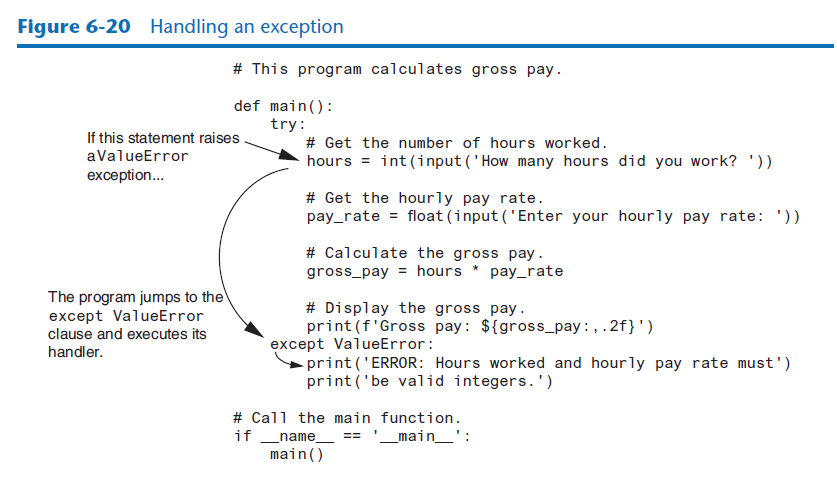

In [ ]:
# import module sys to get the type of exception
#  System-specific parameters and functions
import sys

randomList = ['a', 0, 2]

for entry in randomList:
    try:
        print("The entry is", entry)
        r = 1 / int(entry)
        break
    except:
        print("Please try again.")
        print("Next entry.")
        print()
print("The reciprocal of", entry, "is", r)

In this program, we loop through the values of the **randomList** list. As previously mentioned, the portion that can cause an exception is placed inside the **try** block.

If no exception occurs, the **except** block is skipped and normal flow continues(for last value). But if any exception occurs, it is caught by the **except** block (first and second values).

Here, we print the name of the exception using the **exc_info()** function inside **sys** module. We can see that **a** causes **ValueError** and **0** causes **ZeroDivisionError**.

When an exception is thrown, an object known as an exception object is created in memory.

The exception object usually contains a default error message pertaining to the exception. (In fact, it is the same error message that you see displayed at the end of a traceback when an exception goes unhandled.) 

When you write an except clause, you can optionally assign the exception object to a variable, as shown here:

**except ValueError as err:**

This except clause catches ValueError exceptions. 

The expression that appears after the except clause specifies that we are assigning the exception object to the variable err. (There is nothing special about the name err. That is simply the name that we have chosen for the examples. You can use any name that you wish.) 

After doing this, in the exception handler you can pass the err variable to the print function to display the default error message that Python provides for that type of error. 

In [33]:
# This program calculates gross pay.

def main():
    try:
        # Get the number of hours worked.
        hours = int(input('How many hours did you work? '))

        # Get the hourly pay rate.
        pay_rate = float(input('Enter your hourly pay rate: '))

        # Calculate the gross pay.
        gross_pay = hours * pay_rate

        # Display the gross pay.
        print(f'Gross pay: ${gross_pay:,.2f}')
    except ValueError as err:
        print(err)

In [34]:
main()

How many hours did you work? three
invalid literal for int() with base 10: 'three'


When a ValueError exception occurs inside the try suite (lines 5 through 15), the program branches to the except clause in line 16. 

The expression ValueError as err in line 16 causes the resulting exception object to be assigned to a variable named err. 

The statement in line 17 passes the err variable to the print function, which causes the exception's default error message to be displayed.

Since every exception in Python inherits from the base **Exception** class, we can also perform the above task in the following way:

In [ ]:
# import module sys to get the type of exception
import sys

randomList = ['a', 0, 2]

for entry in randomList:
    try:
        print("The entry is", entry)
        r = 1 / int(entry)
        break
    except Exception as e:
        print("Oops!", e.__class__, "occurred.")
        print("Next entry.")
        print()
print("The reciprocal of", entry, "is", r)

This program has the same output as the above program.

### Catching Specific Exceptions in Python

In the above example, we did not mention any specific exception in the **except** clause.

This is not a good programming practice as it will catch all exceptions and handle every case in the same way. We can specify which exceptions an **except** clause should catch.

A try clause can have any number of except clauses to handle different exceptions, however, only one will be executed in case an exception occurs.

We can use a tuple of values to specify multiple exceptions in an except clause. Here is an example pseudo code.

In [ ]:
try:
   # do something
   pass

except ValueError:
    # handle ValueError exception
    pass

except (TypeError, ZeroDivisionError):
    pass
    # handle multiple exceptions
    # TypeError and ZeroDivisionError

except:
    # handle all other exceptions
    pass

Program (below) reads all of the numbers from the file and adds them to an accumulator variable.

In [ ]:
# This program displays the total of the
# amounts in the sales_data.txt file.

def main():
# Initialize an accumulator.
total = 0.0

try:
# Open the sales_data.txt file.
infile = open('sales_data.txt', 'r')

# Read the values from the file and
# accumulate them.
for line in infile:
    amount = float(line)
    total += amount
    
# Close the file.
infile.close()

# Print the total.
print(f'{total:,.2f}')

except IOError:
    print('An error occured trying to read the file.')

except ValueError:
    print('Non-numeric data found in the file.')

except:
    print('An error occured.')

- If an exception occurs in the try suite, the Python interpreter examines each of the except clauses, from top to bottom, in the try/except statement. 

- When it finds an except clause that specifies a type that matches the type of exception that occurred, it branches to that except clause. 

- If none of the except clauses specifies a type that matches the exception, the interpreter branches to the except clause in line 30.

In [37]:
main()

[Errno 2] No such file or directory: 'sales_data.txt'


In this program, the statement in line 24 is executed only if the statements in the try suite
(lines 9 through 19) execute without raising an exception.

### Raising Exceptions in Python

In Python programming, exceptions are raised when errors occur at runtime. We can also manually raise exceptions using the **raise** keyword.

We can optionally pass values to the exception to clarify why that exception was raised.

- In Python, the interpreter throws a KeyboardInterrupt exception when the user/programmer presses the ctrl – c or del key either accidentally or intentionally.

In [ ]:
raise KeyboardInterrupt

- A MemoryError means that the interpreter has run out of memory to allocate to your Python program. This may be due to an issue in the setup of the Python environment or it may be a concern with the code itself loading too much data at the same time.

In [ ]:
raise MemoryError("This is an argument")

In [ ]:
s = []
for i in range(1000):
    for j in range(1000):
        for k in range(1000):
            s.append("More")

As you might expect, these million strings are a bit much for, let’s say, a laptop to handle. The following error is printed out:

C:\code\Python\MemErr\venv\3K\Scripts\python.exe C:/code/python/MemErr/main.py
Traceback (most recent call last):
  File "C:/code/python/MemErr/main.py", line 6, in <module>
    s.append("More")
MemoryError

- If this is happening, it may be an indication that more code optimization techniques are required. 

In [5]:
try:
    a = int(input("Enter a positive integer: "))
    if a <= 0:
        raise ValueError("That is not a positive number!")
except ValueError as e:
    print(e)

Enter a positive integer: !
invalid literal for int() with base 10: '!'


### Python try with else clause

In some situations, you might want to run a certain block of code if the code block inside **try** ran without any errors. For these cases, you can use the optional **else** keyword with the **try** statement.

> **Note:** Exceptions in the else clause are not handled by the preceding except clauses.


## The else Clause

The try/except statement may have an optional else clause, which appears after all the
except clauses. 

Here is the general format of a try/except statement with an else clause:

try:
    statement
    statement
    etc.
except ExceptionName:
    statement
    statement
    etc.
else:
    statement
    statement
    etc.
   

The block of statements that appears after the else clause is known as the else suite. The statements in the else suite are executed after the statements in the try suite, only if no exceptions were raised. If an exception is raised, the else suite is skipped.

Let's look at an example:

In [ ]:
# This program displays the total of the
# amounts in the sales_data.txt file.

def main():
    # Initialize an accumulator.
    total = 0.0

    try:
        # Open the sales_data.txt file.
        infile = open('sales_data.txt', 'r')

        # Read the values from the file and
        # accumulate them.
        for line in infile:
            amount = float(line)
            total += amount

            # Close the file.
            infile.close()
    except Exception as err:
        print(err)
    else:
    # Print the total.
        print(f'{total:,.2f}')

In [6]:
# program to print the reciprocal of even numbers

def reciprocal():
    try:
        num = int(input("Enter a number: "))
        assert num % 2 == 0  
    except:
        print("Not an even number!")
    else:
        reciprocal = 1/num
        print(reciprocal)

If we pass an odd number:

In [7]:
reciprocal()

Enter a number: 5
Not an even number!


If we pass an even number, the reciprocal is computed and displayed.

In [8]:
reciprocal()

Enter a number: 6
0.16666666666666666


However, if we pass **0**, we get **ZeroDivisionError** as the code block inside else is not handled by preceding **except**.

In [9]:
reciprocal()

Enter a number: 0


ZeroDivisionError: division by zero

- In simpler terms, we can say that assertion is the boolean expression that checks if the statement is True or False. If the statement is true then it does nothing and continues the execution, but if the statement is False then it stops the execution of the program and throws an error.

In [11]:
# initializing number
a = 4
b = 1

# using assert to check for 0
print("The value of a / b is : ")
assert b != 0
print(a / b)


The value of a / b is : 
4.0


In [15]:
# initializing number
a = 4
b = 0

# using assert to check for 0
print("The value of a / b is : ")
assert b != 0, "Zero Division Error"
print(a / b)

The value of a / b is : 


AssertionError: Zero Division Error

### Python try ... finally

The **try** statement in Python can have an optional **finally** clause. This clause is executed no matter what, and is generally used to release external resources.

For example, we may be connected to a remote data center through the network or working with a file or a Graphical User Interface (GUI).

In all these circumstances, we must clean up the resource before the program comes to a halt whether it successfully ran or not. These actions (closing a file, GUI or disconnecting from network) are performed in the **finally** clause to guarantee the execution.

## The finally Clause

The try/except statement may have an optional finally clause, which must appear after all the except clauses. 

Here is the general format of a try/except statement with a finally clause:

try:
    statement
    statement
    etc.
except ExceptionName:
    statement
    statement
    etc.
finally:
    statement
    statement
    etc.
    
Here is an example of file operations to illustrate this.

In [ ]:
try:
    f = open("test.txt", encoding = 'utf-8')
    # perform file operations
finally:
    f.close()

The block of statements that appears after the finally clause is known as the finally suite.

The statements in the finally suite are always executed after the try suite has executed, and after any exception handlers have executed. 

The statements in the finally suite execute whether an exception occurs or not. The purpose of the finally suite is to perform cleanup operations, such as closing files or other resources. 

Any code that is written in the finally suite will always execute, even if the try suite raises an exception.